# 二、图论模型

## 1.最短路径
最短路径问题是图论中非常经典的问题之一, 旨在寻找图中两顶点之间的最短路径. 作为一个基本工具, 实际应用中的许多优化问题, 如管道铺设、线路安排、厂区布局、设备更新等, 都可被归结为最短路径问题来解决.

$G(V,E)$是一个简单有向图,$|V|=n,|E|=m,$邻接矩阵$A=(a_{i,j})_{n\times n},i=1..n,j=1..n$

### 数学模型
$x_{i,j}=1$ 表示(i,j)边在s到t的最短路径上。
$x_{i,j}=0$ 表示(i,j)边不在s到t的最短路径上。



$$
\begin{array}{ll}
\min & \sum_{i=1..n} \sum_{j=1..n} a_{i,j}x_{i,j}, \\
\text { s.t. } & \left\{\begin{array}{l}
\sum_{j=1..n}x_{s,j}-\sum_{i=1..n}x_{i,s}=1, k=s\\
\sum_{j=1..n}x_{t,j}-\sum_{i=1..n}x_{i,t}=-1, k=t, \\
\sum_{j=1..n}x_{k,j}-\sum_{i=1..n}x_{i,k}=0, k\ne t, k\ne s\\
x_{i,j}=0, 1
\end{array}\right.
\end{array}
$$

### 最短路径算法


一般求最短路径不包含负圈

第一类: 单点到其他所有点最短路径

1. Dijkstra 算法不考虑负权边: dist(v) = min{dist(v),dist(u) + w(u,v)}

2. Bell-Ford 算法考虑负权边

3. DAG 特例，有向无圈图，拓扑排序

第二类: 所有点之间最短路径

4. Floyd 算法，O(n^3), 支持负权边

5. Johnson算法，O(n^2 logn),支持负权边

#### Dijkstra 算法 （贪婪算法）

##### 基本步骤

Initial State:

Start node has dist 0

All other nodes have cost ∞

At each step:

Pick closest unknown vertex v

Add it to the "cloud" of known vertices

Update distances for nodes with edges from v


##### 伪代码

dijkstra(Graph G, Node start) {

 for each node: x.dist=infinity, x.known=false

 start.dist = 0

 build-heap with all nodes

 while(heap is not empty) {

   b = deleteMin()

   b.known = true

   for each edge (b,a) in G

     if(!a.known)
       if(b.dist + weight((b,a)) < a.dist){
          a.dist = b.dist + weight((b,a)
	      a.prev = b
       }
}

#### Bellman-Ford算法

##### 伪代码
 BellmanFord(list vertices, list edges, vertex source)\
   // 该实现读入边和节点的列表，并向两个数组（distance和predecessor）中写入最短路径信息

   // 步骤1：初始化图\
   for each vertex v in vertices:\
       if v is source then distance[v] := 0\
       else distance[v] := infinity\
       predecessor[v] := null

   // 步骤2：重复对每一条边进行松弛操作\
   for i from 1 to size(vertices)-1:\
       for each edge (u, v) with weight w in edges:\
           if distance[u] + w < distance[v]:\
               distance[v] := distance[u] + w\
               predecessor[v] := u

   // 步骤3：检查负权环\
   for each edge (u, v) with weight w in edges:\
       if distance[u] + w < distance[v]:\
           error "图包含了负权环"

In [ ]:
# Pytho内部函数

from collections import defaultdict

class Graph:

    def initial(self, vertices):
        self.V = vertices # No. of vertices
        self.graph = [] # default dictionary to store graph

    def add(self, u, v, w):
        self.graph.append([u, v, w])

    def printsol(self, dist):
        print("Vertex   Distance from Source")
        for i in range(self.V):
            print("% d \t\t % d" % (i, dist[i]))

    def BellmanFord(self, src):

        dist = [float("Inf")] * self.V
        dist[src] = 0

        for i in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                        dist[v] = dist[u] + w

        for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                        print("Graph contains negative weight cycle")
                        return

        self.printArr(dist)

Floyd 算法

At first, we initialize a graph matrix(square) in which the vertexes containing no edges will be marked as infinity and the graph containing self-loop will be marked as zero.
The initialization matrix will be marked as k=0 and then we will run 3 for loops k=n nested with i=n nested with j=n. Where n is the number of vertexes.
We update the values of thi=e distances in the final loop as dist[i][j] as dist[i][k] + dist[k][j] if dist[i][j] > dist[i][k] + dist[k][j].
When the loop terminates the final values of the dist matrix are the shortest path among all edges one to another.

INF = 99999


In [ ]:
# Pytho内部函数
def floydWarshall(graph,n): #n=no. of vertex
    dist=graph
    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j] ,dist[i][k]+ dist[k][j])
    return dist

#### Johnson's algorithm

1 给定图 G = (V, E)，增加一个新的顶点 s，使 s 指向图 G 中的所有顶点都建立连接，设新的图为 G’；

2 对图 G’ 中顶点 s 使用 Bellman-Ford 算法计算单源最短路径，得到结果 h[] = {h[0], h[1], .. h[V-1]}；

3 对原图 G 中的所有边进行 "re-weight"，即对于每个边 (u, v)，其新的权值为 w(u, v) + (h[u] - h[v])；

4 移除新增的顶点 s，对每个顶点运行 Dijkstra 算法求得最短路径；

为什么修改后的权值一定非负呢？ 因为h[v]是最短路径，所以 w(u, v) + h[u]  $\ge$ h[v]，即 w(u, v) + (h[u] - h[v]) $\ge$ 0


In [ ]:
# Pytho内部函数

# Implementation of Johnson's algorithm in Python3
# Import function to initialize the dictionary
from collections import defaultdict
MAX_INT = float('Inf')

# Returns the vertex with minimum
# distance from the source
def minDistance(dist, visited):

    (minimum, minVertex) = (MAX_INT, 0)
    for vertex in range(len(dist)):
        if minimum > dist[vertex] and visited[vertex] == False:
            (minimum, minVertex) = (dist[vertex], vertex)

    return minVertex


# Dijkstra Algorithm for Modified
# Graph (removing negative weights)
def Dijkstra(graph, modifiedGraph, src):

    # Number of vertices in the graph
    num_vertices = len(graph)

    # Dictionary to check if given vertex is
    # already included in the shortest path tree
    sptSet = defaultdict(lambda : False)

    # Shortest distance of all vertices from the source
    dist = [MAX_INT] * num_vertices

    dist[src] = 0

    for count in range(num_vertices):

        # The current vertex which is at min Distance
        # from the source and not yet included in the
        # shortest path tree
        curVertex = minDistance(dist, sptSet)
        sptSet[curVertex] = True

        for vertex in range(num_vertices):
            if ((sptSet[vertex] == False) and
                (dist[vertex] > (dist[curVertex] +
                modifiedGraph[curVertex][vertex])) and
                (graph[curVertex][vertex] != 0)):

                dist[vertex] = (dist[curVertex] +
                                modifiedGraph[curVertex][vertex]);

    # Print the Shortest distance from the source
    for vertex in range(num_vertices):
        print ('Vertex ' + str(vertex) + ': ' + str(dist[vertex]))

# Function to calculate shortest distances from source
# to all other vertices using Bellman-Ford algorithm
def BellmanFord(edges, graph, num_vertices):

    # Add a source s and calculate its min
    # distance from every other node
    dist = [MAX_INT] * (num_vertices + 1)
    dist[num_vertices] = 0

    for i in range(num_vertices):
        edges.append([num_vertices, i, 0])

    for i in range(num_vertices):
        for (src, des, weight) in edges:
            if((dist[src] != MAX_INT) and
                    (dist[src] + weight < dist[des])):
                dist[des] = dist[src] + weight

    # Don't send the value for the source added
    return dist[0:num_vertices]

# Function to implement Johnson Algorithm
def JohnsonAlgorithm(graph):

    edges = []

    # Create a list of edges for Bellman-Ford Algorithm
    for i in range(len(graph)):
        for j in range(len(graph[i])):

            if graph[i][j] != 0:
                edges.append([i, j, graph[i][j]])

    # Weights used to modify the original weights
    modifyWeights = BellmanFord(edges, graph, len(graph))

    modifiedGraph = [[0 for x in range(len(graph))] for y in
                    range(len(graph))]

    # Modify the weights to get rid of negative weights
    for i in range(len(graph)):
        for j in range(len(graph[i])):

            if graph[i][j] != 0:
                modifiedGraph[i][j] = (graph[i][j] +
                        modifyWeights[i] - modifyWeights[j]);

    print ('Modified Graph: ' + str(modifiedGraph))

    # Run Dijkstra for every vertex as source one by one
    for src in range(len(graph)):
        print ('\nShortest Distance with vertex ' +
                        str(src) + ' as the source:\n')
        Dijkstra(graph, modifiedGraph, src)

# Driver Code
graph = [[0, -5, 2, 3],
         [0, 0, 4, 0],
         [0, 0, 0, 1],
         [0, 0, 0, 0]]

JohnsonAlgorithm(graph)

Modified Graph: [[0, 0, 3, 3], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

Shortest Distance with vertex 0 as the source:

Vertex 0: 0
Vertex 1: 0
Vertex 2: 0
Vertex 3: 0

Shortest Distance with vertex 1 as the source:

Vertex 0: inf
Vertex 1: 0
Vertex 2: 0
Vertex 3: 0

Shortest Distance with vertex 2 as the source:

Vertex 0: inf
Vertex 1: inf
Vertex 2: 0
Vertex 3: 0

Shortest Distance with vertex 3 as the source:

Vertex 0: inf
Vertex 1: inf
Vertex 2: inf
Vertex 3: 0


[0, 1, 2, 3, 4]
{0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 3, 4]}
{4: [4], 3: [3, 4], 2: [2, 3, 4], 1: [1, 2, 3, 4], 0: [0, 1, 2, 3, 4]}
{0: {0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 3, 4]}, 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 3, 4]}, 2: {2: [2], 1: [2, 1], 3: [2, 3], 0: [2, 1, 0], 4: [2, 3, 4]}, 3: {3: [3], 2: [3, 2], 4: [3, 4], 1: [3, 2, 1], 0: [3, 2, 1, 0]}, 4: {4: [4], 3: [4, 3], 2: [4, 3, 2], 1: [4, 3, 2, 1], 0: [4, 3, 2, 1, 0]}}


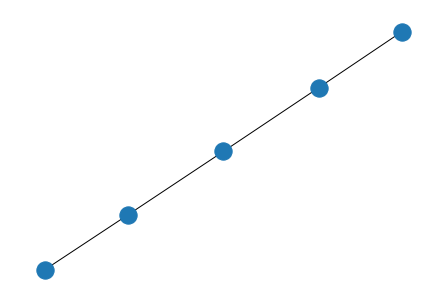

In [ ]:
# 示例
import networkx as nx

G = nx.path_graph(5)
nx.draw(G)

print(nx.shortest_path(G, source=0, target=4))

p = nx.shortest_path(G, source=0)  # target not specified
print(p)

p = nx.shortest_path(G, target=4)  # source not specified
print(p)

p = nx.shortest_path(G)  # source, target not specified
print(p)


## 2.最小生成树

应用背景：通讯和电力系统的布线成本最小



### 数学模型

G(V,E), |V|=n, |E|=m,

$a_{i,j} = w_{i,j}$, (i,j)边存在

$a_{i,j} = \infty $, (i,j)边不存在

$x_{i,j} = 1$, (i,j)边在MST上

$x_{i,j} = 0 $, (i,j)边不在MST上


目标：G的生成树的总权重最小

min = $\sum_{i=1..n} \sum_{j=1..n} a_{i,j}x_{i,j}$

min = $\sum_{(i,j)\in E} a_{i,j}x_{i,j}$

min = $\sum_{e_j\in E} w_j x_j$



约束条件：

（1）$x_{i,j} = 0,1 $

（2）$\sum_{i=1..n} \sum_{j=1..n} x_{i,j}= n-1 $

（3）不构成圈

$\sum_{i\in S} \sum_{j\in S,(i,j)\in E} x_{i,j}\le |S|-1,\forall S \subset V $

这个模型不是很好，条件(3)会产生指数个约束

但是最小生成树的算法可以得到全局最优


### kruskal 算法（贪婪算法）


1.	Put edges in min-heap using edge weights

2.	While output size < |V|-1

a)	Consider next smallest edge (u,v)

b)	if find(u,v) indicates u and v are in different sets

•	 output (u,v)

•	 union(u,v)



### Prim算法
1.	For each node v, set  v.cost =  and v.known = false
2.	Choose any node v.

a)	Mark v as known

b)	For each edge (v,u) with weight w, set u.cost = w and u.prev = v

3.	While there are unknown nodes in the graph

a)	Select the unknown node v with lowest cost

b)	Mark v as known and add (v, v.prev) to output

c)	For each edge (v,u) with weight w,
		   if(w < u.cost) {
		        u.cost = w;
	     u.prev = v;
		   }



[(0, 1, {}), (1, 2, {}), (2, 3, {})]

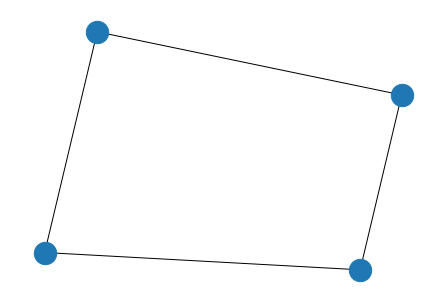

In [ ]:
# 示例
import networkx as nx
G = nx.cycle_graph(4)
G.add_edge(0, 3, weight=2)
nx.draw(G, label = True, font_color = 'white',node_size = 500)
T = nx.minimum_spanning_tree(G)
sorted(T.edges(data=True))


## 3.最大流

#### 最大流的应用
Max flow and min cut.
Two very rich algorithmic problems.
Cornerstone problems in combinatorial optimization.
Beautiful mathematical duality

Nontrivial applications / reductions.
- Data mining.
- Open-pit mining.
- Project selection.
- Airline scheduling.
- Bipartite matching.
- Baseball elimination.
- Image segmentation.
- Network connectivity.
- Network reliability.
- istributed computing.
- Egalitarian stable matching.
- Security of statistical data.
- Network intrusion detection.
- Multi-camera scene


#### 最大流数学模型
s-t 流的定义

s-t 割的定义

G(V,E,s,t,c),|V|=n,|E|=m,

st-流，$x_{i,j}$

目标函数：从s到t流达到最大

max = v= $ \sum_{j=1..n,(s,j)\in E} x_{s,j}$

max = v

s.t.

$k=s$, $\sum_{i=1..n,(i,s)\in E}x_{i,s}=0,\sum_{j=1..n,(s,j)\in E}x_{s,j}=v$

$k=t$, $\sum_{i=1..n}x_{i,t}= v, \sum_{j=1..n}x_{t,i} =0$

$k\ne t,k\ne s$, $\sum_{j=1..n}x_{k,j}-\sum_{i=1..n}x_{i,k}=0$

$0 \le x_{i,j} \le c_{i,j}$

#### 最大流定理和最大流算法研究算法进展





定理1：弱对偶，任意流小于等于最小割

定理2：强对偶，最大流等于最小割

定理3：f是最大流当且仅当剩余网络中没有增广路径

Ford-Fulkerson Algorithm
The following is simple idea of Ford-Fulkerson algorithm:
-   Start with initial flow as 0.
-   While there is a augmenting path from source to sink.
           Add this path-flow to flow.
-   Return flow.


## 4.匹配

### 数学模型
G(V,E), |V|=n, |E|=m,


$x_{i,j} = 1$, (i,j)边在最大匹配中

$x_{i,j} = 0 $, i,j)边不在最大匹配中


目标：匹配的边数达到最大

max = $\sum_{i=1..n} \sum_{j=1..n} x_{i,j}$

约束条件：

（1）$x_{i,j} = 0,1 $

（2）$\sum_{j=1..n}  x_{i,j}\le 1, i = 1..n$

（3）$\sum_{i=1..n}  x_{i,j}\le 1, j = 1..n $


[0, 1]
[2, 3, 4]
{0: 2, 1: 3, 2: 0, 3: 1}


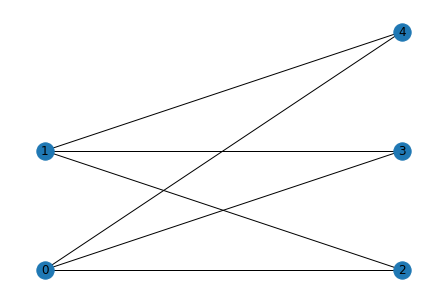

In [ ]:
# 示例
G = nx.complete_bipartite_graph(2, 3)
left, right = nx.bipartite.sets(G)

pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(left) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(right) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, with_labels = True)

print(list(left))

print(list(right))

match = nx.bipartite.maximum_matching(G)
print(match)

## 5. Vertex Cover
**Definition:** The set of vertices $W \subseteq V$ with for all $(x, y) \in E$: $x \in W$ or $y \in W$
**Vertex Cover Problem:** Given graph $G$, find vertex cover of minimum size.
**Symbol:** $G(V,E), |V|=n, |E|=m, A=(a_{ij})_{n*n}$ is adjacency matrix.
**Model:**
$$
\begin{array}{ll}
\min & \sum_{i = 1}^n x_i, \\
\text { s.t. } & \left\{\begin{array}{l}
x_i \in \{0, 1\}\\
x_i + x_j \geqslant a_{ij}
\end{array}\right.
\end{array}
$$

## 6. Dominating Set
**Definition:** The set of vertices $W \subseteq V$ such that for all $v \in V$: $v \in W$ or $v$ has a neighbor $w$ with $w \in W$
**Dominating Set Problem:** Given graph $G$, find dominating set of minimum size.
**Symbol:** $G(V,E), |V|=n, |E|=m, A=(a_{ij})_{n*n}$ is adjacency matrix.
**Model:**
$$
\begin{array}{ll}
\min & \sum_{i = 1}^n x_i, \\
\text { s.t. } & \left\{\begin{array}{l}
x_i \in \{0, 1\}\\
\sum_{j=1}^n a_{ij}x_i \geqslant 1-x_i
\end{array}\right.
\end{array}
$$

## 7. Clique
**Definition:** The set of vertices $W \subseteq V$ with for all $v,w \in W: \{v,w \} \in E$
**Clique Problem:** Given graph $G$, find clique of maximun size.
**Symbol:** $G(V,E), |V|=n, |E|=m, A=(a_{ij})_{n*n}$ is adjacency matrix.
**Model:**
$$
\begin{array}{ll}
\max & \sum_{i = 1}^n x_i, \\
\text { s.t. } & \left\{\begin{array}{l}
x_i \in \{0, 1\}\\
x_i + x_j \leqslant 1 + a_{ij}
\end{array}\right.
\end{array}
$$

## 8. networkx代码实例
相比于networkx, igraph的底层用c语言实, 效率更高.

### 构建图

[[0. 9. 2. 4. 7.]
 [0. 0. 3. 4. 0.]
 [0. 0. 0. 8. 4.]
 [0. 0. 0. 0. 6.]
 [0. 0. 0. 0. 0.]]
[0 0 0 0 1 1 2 2 3] [1 2 3 4 2 3 3 4 4]
[9. 2. 4. 7. 3. 4. 8. 4. 6.]
[(0, 1, 9.0), (0, 2, 2.0), (0, 3, 4.0), (0, 4, 7.0), (1, 2, 3.0), (1, 3, 4.0), (2, 3, 8.0), (2, 4, 4.0), (3, 4, 6.0)]


{(0, 1): Text(-0.6545085608959198, -0.4755282839152457, '9.0'),
 (0, 2): Text(-0.09549137949943542, -0.2938925166937949, '2.0'),
 (0, 3): Text(-0.09549149870872498, 0.29389257828263027, '4.0'),
 (0, 4): Text(-0.6545087099075317, 0.47552813688782436, '7.0'),
 (1, 2): Text(0.2500000596046448, -0.769420713186264, '3.0'),
 (1, 3): Text(0.24999994039535522, -0.18163561820983887, '4.0'),
 (2, 3): Text(0.8090171217918396, 1.4901161193847656e-07, '8.0'),
 (2, 4): Text(0.24999991059303284, 0.18163570761680603, '4.0'),
 (3, 4): Text(0.2499997913837433, 0.7694208025932312, '6.0')}

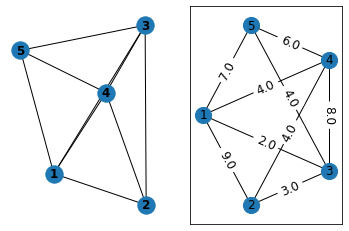

In [ ]:
# 构建图1
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 输入邻接矩阵的上三角元素
a = np.zeros((5, 5))
a[0, 1:5] = [9, 2, 4, 7]
a[1, 2:5] = [3, 4, 0]
a[2, 3:5] = [8, 4]
a[3, 4:5] = [6]
print(a)

# 提取顶点编号
i, j = np.nonzero(a) # np.nonzero() return a tuple
print(i, j)

# 提取a的非零元素
w = a[i, j]
print(w)

# 构建边信息
edges = list(zip(i, j, w))
print(edges)

G = nx.Graph()
G.add_weighted_edges_from(edges)

# 顶点标号
key = range(5)
s = [str(i+1) for i in range(5)]
s = dict(zip(key, s)) # 构造用于顶点标注的字符字典
# print(s)

plt.rc('font', size=18)

# nx.draw()
plt.subplot(121)
nx.draw(G, font_weight='bold', labels=s)

# nx.draw_networkx()
plt.subplot(122)
pos = nx.shell_layout(G) #布局设置
# print("pos=", pos)
nx.draw_networkx(G, pos, node_size=260, labels=s)

# nx.draw_networkx_edge_labls()
w = nx.get_edge_attributes(G, 'weight') # Get edge attributes from graph; Return dictionary
# print("w=", w)
nx.draw_networkx_edge_labels(G, pos, font_size=12, edge_labels=w) #标记权重
# plt.show()

{(1, 2): Text(-0.6545085608959198, -0.4755282839152457, '9'),
 (1, 3): Text(-0.09549137949943542, -0.2938925166937949, '2'),
 (1, 4): Text(-0.09549149870872498, 0.29389257828263027, '4'),
 (1, 5): Text(-0.6545087099075317, 0.47552813688782436, '7'),
 (2, 3): Text(0.2500000596046448, -0.769420713186264, '3'),
 (2, 4): Text(0.24999994039535522, -0.18163561820983887, '4'),
 (3, 4): Text(0.8090171217918396, 1.4901161193847656e-07, '8'),
 (3, 5): Text(0.24999991059303284, 0.18163570761680603, '4'),
 (4, 5): Text(0.2499997913837433, 0.7694208025932312, '6')}

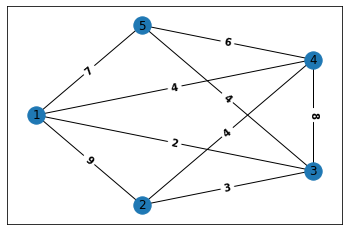

In [ ]:
# 构建图2
import networkx as nx

List = [(1, 2, 9), (1, 3, 2), (1, 4, 4), (1, 5, 7), (2, 3, 3), (2, 4, 4), (3, 4, 8), (3, 5, 4), (4, 5, 6)]

G = nx.Graph()
G.add_nodes_from(range(1, 6))
G.add_weighted_edges_from(List)
pos = nx.shell_layout(G)
w = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, font_weight='bold', edge_labels=w)

{3: {}, 2: {}, 4: {}, 6: {}}
[1, 6, 3, 4, 2, 5]
9223372036854775807
{1: {2, 3}, 2: {1, 3, 4, 5}, 3: {1, 2, 5}, 4: {2, 5, 6}, 5: {2, 3, 4, 6}, 6: {4, 5}} dict_keys([1, 2, 3, 4, 5, 6])


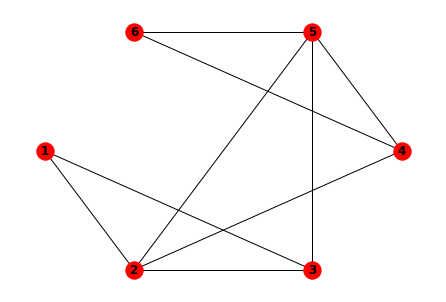

In [ ]:
# 构建图3
import networkx as nx

List = [(1, 2), (1, 3), (2, 3), (3, 2), (3, 5), (4, 2), (4, 6), (5, 2), (5, 4), (5, 6), (6, 5)]
G = nx.Graph()
G.add_nodes_from(range(1, 6))
G.add_edges_from(List)
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='r')

print(G[5])

nodes_by_degree = sorted(G, key=lambda x: len(G[x]))
print(nodes_by_degree)

import sys

# fetching the maximum value
max_val = sys.maxsize
print(max_val)

graph = {n: set(G[n]) - {n} for n in G}
print(graph, graph.keys())

### 最短路、最小生成树、最大流、独立集、最小点覆盖等

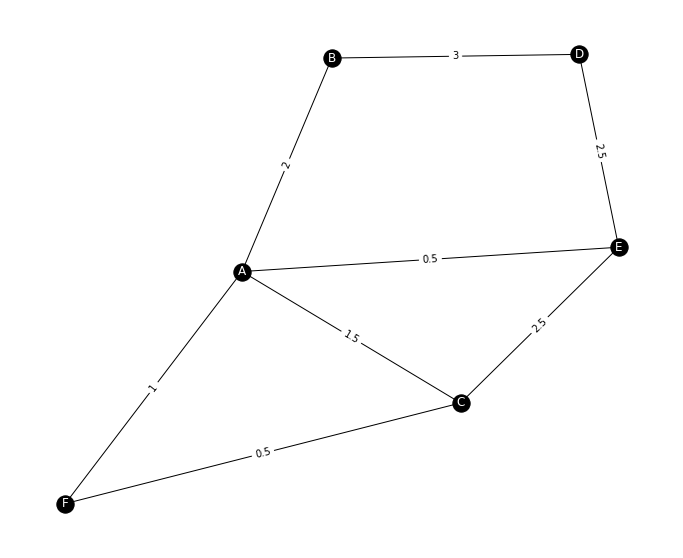

['A', 'F', 'B', 'C', 'D', 'E']
<class 'networkx.classes.reportviews.NodeView'>
A <class 'str'>
F <class 'str'>
B <class 'str'>
C <class 'str'>
D <class 'str'>
E <class 'str'>
------------------------------------------------------------
A 4 <class 'int'>
F 2 <class 'int'>
B 2 <class 'int'>
C 3 <class 'int'>
D 2 <class 'int'>
E 3 <class 'int'>
------------------------------------------------------------
Degree: =  [4, 2, 2, 3, 2, 3]
------------------------------------------------------------
DFS =  ['A', 'F', 'B', 'C', 'E', 'D']
[('A', 'F'), ('A', 'B'), ('A', 'C'), ('A', 'E'), ('B', 'D')]
[('A', 'F'), ('F', 'C'), ('A', 'B'), ('B', 'D'), ('A', 'E')]
------------------------------------------------------------
minimum_spanning_tree =  [('A', 'B', {'weight': 2, 'capacity': 2}), ('A', 'E', {'weight': 0.5, 'capacity': 0.5}), ('A', 'F', {'weight': 1, 'capacity': 1}), ('D', 'E', {'weight': 2.5, 'capacity': 2.5}), ('F', 'C', {'weight': 0.5, 'capacity': 0.5})]
-----------------------------------

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

g = nx.Graph()

g.add_edge('A', 'F', weight=1, capacity = 1)
g.add_edge('A', 'B', weight=2, capacity = 2)
g.add_edge('A', 'C', weight=1.5, capacity = 1.5)
g.add_edge('B', 'D', weight=3, capacity = 3)
g.add_edge('D', 'E', weight=2.5, capacity = 2.5)
g.add_edge('E', 'C', weight=2.5, capacity = 2.5)
g.add_edge('A', 'E', weight=0.5, capacity = 0.5)
g.add_edge('F', 'C', weight=0.5, capacity = 0.5)

# 边权重
edge_labels = {e: g.edges[e]['weight'] for e in g.edges}
# print("edge_labels = ", edge_labels)

# 设置布局
pos = nx.fruchterman_reingold_layout(g);

plt.figure(figsize=(12,10));
plt.axis("off");
# 设置点、边、点标签、边标签
nx.draw_networkx_nodes(g, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(g, pos, alpha=1);
nx.draw_networkx_labels(g, pos, font_color="white"); # node labels
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

plt.show();

nodes = g.nodes()
print(nodes)
print(type(nodes))
for node in nodes:
    print(node,type(node))
print("-"*60)

degrees = g.degree()
for node, degree in degrees:
    print(node, degree, type(degree))
print("-"*60)

# 顶点度
degree = [d for node,d in nx.degree(g)]
print("Degree: = ", degree)
print("-"*60)

# p, k = np.histogram(degree, bins = 4)
# plt.hist(degree)


edges = g.edges()
# print(type(edges))
# print(edges)

# for edge in edges:
#     print(edge)

# DFS
edges = list(nx.bfs_edges(g, source='A'))
nodes = ['A'] + [v for u, v in edges]
print("DFS = ", nodes)

edges2 = list(nx.dfs_edges(g, source='A', depth_limit=2))
print(edges)
print(edges2)
print("-"*60)

# 最小生成树
T = nx.minimum_spanning_tree(g, weight='weight', algorithm='kruskal')
print("minimum_spanning_tree = ", sorted(T.edges(data=True))) # data=True 显示权重
print("-"*60)

w = nx.get_edge_attributes(g, 'weight')
# 指定初始点、终点 最短路
d1 = nx.shortest_path_length(g, source='D', target='F', weight='weight', method='dijkstra')
print("source-target_SP_length = ", d1)
print("-"*60)

# 任意两点 最短路
pair_d = list(nx.shortest_path_length(g, weight='weight'))
print("pair_SP_length = ", pair_d)
print("-"*60)

# 最大流
flow_value, flow_dict = nx.maximum_flow(g, "D", "F")
print("flow_value = ", flow_value)
print("flow_dict = ", flow_dict)
print("-"*60)

# 独立集
indset = nx.maximal_independent_set(g)
print("indset = ", indset)
print("-"*60)

# 最小点覆盖
# from networkx.algorithms.approximation import min_weighted_vertex_cover
cover = nx.algorithms.approximation.vertex_cover.min_weighted_vertex_cover(g) # Return a set of nodes whose weight sum is no more than twice the weight sum of the minimun weight vertex cover. 近似解
# help(nx.algorithms.approximation.vertex_cover.min_weighted_vertex_cover)
print("Cover:", cover)

## 9. 社团划分与网络瓦解

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
nodes =  ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a31', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41', 'a42', 'a43', 'a44', 'a45', 'a46', 'a47', 'a48', 'a49', 'a50', 'a51', 'a52', 'a53', 'a54', 'a55', 'a56', 'a57', 'a58', 'a59', 'a60', 'a61', 'a62', 'a63', 'a64', 'a65', 'a66', 'a67', 'a68', 'a69', 'a70', 'a71', 'a72', 'a73', 'a74', 'a75', 'a76', 'a77', 'a78', 'a79', 'a80', 'a81', 'a82', 'a83', 'a84', 'a85', 'a86', 'a87', 'a88', 'a89', 'a90', 'a91', 'a92', 'a93', 'a94', 'a95', 'a96', 'a97', 'a98', 'a99', 'b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25

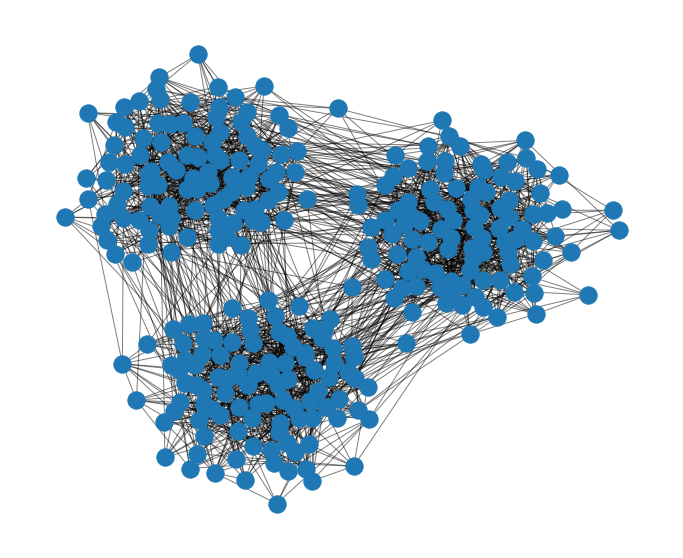

[frozenset({'b21', 'c92', 'c67', 'c70', 'c94', 'c93', 'c15', 'c77', 'c76', 'c27', 'c89', 'c31', 'c38', 'c33', 'c18', 'c66', 'c60', 'c56', 'a85', 'c44', 'c87', 'c58', 'c2', 'c71', 'c10', 'c51', 'c16', 'c78', 'c64', 'c63', 'c96', 'c40', 'c39', 'c20', 'c17', 'c65', 'c43', 'c55', 'c13', 'c28', 'c22', 'c57', 'c8', 'c14', 'c52', 'c46', 'c69', 'c85', 'c50', 'c82', 'c54', 'c49', 'c6', 'c3', 'c11', 'c98', 'c84', 'c35', 'c80', 'c4', 'c74', 'c1', 'c79', 'c61', 'c36', 'c75', 'c72', 'c0', 'c47', 'c19', 'c86', 'c26', 'c9', 'c73', 'c88', 'c30', 'c25', 'c53', 'c37', 'c29', 'c97', 'c83', 'c48', 'c81', 'c5', 'c7', 'c45', 'c34', 'c90', 'c68', 'c99', 'c24', 'c41', 'c95', 'c59', 'c23', 'c91', 'c21', 'c12', 'c42', 'c62', 'c32'}), frozenset({'a80', 'a32', 'a44', 'a79', 'a25', 'a39', 'a16', 'a59', 'a55', 'a75', 'a31', 'a57', 'a19', 'a37', 'a90', 'a65', 'a52', 'a62', 'a94', 'a15', 'a99', 'a78', 'a17', 'a89', 'a47', 'a86', 'a69', 'a41', 'a92', 'a24', 'a21', 'a27', 'a22', 'a58', 'a74', 'a53', 'a60', 'a63', 'a88'

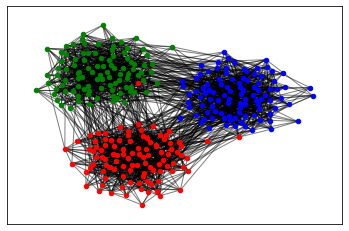

In [ ]:
# 社团划分
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def GN_benchmark(N=300, C=3, zin=13, zout =3):
    import random
    n = int(N/C) # 每个社团的节点数

    nodes = []
    nall = []
    names = [chr(ord('a')+i) for i in range(26)]
    print(names)

    for a in names[:C]:
        xx = []
        for i in range(n):
            xx.append(a+str(i))
        nodes += xx
        nall.append(xx)
    print("nodes = ", nodes)
    print("nall = ", nall)

    pin = 1.0*zin/(n-1)/2
    pout = 1.0*zout/(3*n-1)/2

    g = nx.Graph()

    for nc in nall:
        for i in nc:
            for j in nc:
                if i == j:
                    continue
                p = random.random()
                if p < pin:
                    g.add_edge(i,j)
            for j in set(nodes)-set(nc):
                p = random.random()
                if p < pout:
                    g.add_edge(i,j)
    return g

g = GN_benchmark(300, 3)
pos = nx.fruchterman_reingold_layout(g)

plt.figure(figsize=(12,10))
plt.axis("off")
nx.draw_networkx_nodes(g, pos, node_size=300)
nx.draw_networkx_edges(g, pos, alpha=0.500)

plt.show()

from networkx.algorithms.community import greedy_modularity_communities

partition = list(greedy_modularity_communities(g))
print(partition)

colors=['r','g','b']
i = 0
for part in partition:
    list_nodes = [node for node in part]
    nx.draw_networkx_nodes(g, pos, list_nodes, node_size = 20,
                                node_color = colors[i])
    i = i + 1


nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.show()


In [ ]:
# 网络瓦解
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import operator

n = 100
BA = nx.barabasi_albert_graph(n, 2, seed=22)

plt.figure()
pos = nx.fruchterman_reingold_layout(BA)

nc = nx.draw_networkx_nodes(BA, pos, node_size=100, cmap=plt.cm.RdYlBu,  node_color=list(nx.degree_centrality(BA).values()))

nx.draw_networkx_edges(BA, pos, alpha=0.500)

plt.axis('off')


gc_size_BA = []
BA_copy = BA.copy()
for i in range(30):
    BA_copy.remove_nodes_from(np.random.choice(list(BA_copy.nodes()), 2))
    GC_nodes = max(nx.connected_components(BA_copy), key=len)
    GCC = BA_copy.subgraph(GC_nodes).copy()
    BA_copy = GCC
    gc_size_BA.append(len(list(GCC.nodes()))/n)

print(gc_size_BA)

BA_copy = BA.copy()

gc_size_BA_attack = []

for i in range(30):
    top = list(nx.degree_centrality(BA_copy).items())
    top.sort(key=operator.itemgetter(1), reverse=True)
    top_nodes = [nd for nd, c in top]
    BA_copy.remove_nodes_from(top_nodes[:2])

    try:
        GC_nodes = max(nx.connected_components(BA_copy), key=len)
        GCC = BA_copy.subgraph(GC_nodes).copy()
        BA_copy = GCC
        gc_size_BA_attack.append(len(list(GCC.nodes()))/n)
    except:
        gc_size_BA_attack.append(0)

print(gc_size_BA_attack)

plt.figure(figsize=(10,8))
x = [(2+(i*2))/n for i in range(30)]
plt.plot(x, gc_size_BA, 'bo', label='BA random')
plt.plot(x, gc_size_BA_attack, 'r*', label='BA degree')
plt.xlabel('Fration of Nodes Removed, $f$')
plt.ylabel('Size of Giant Component, $S$')
plt.legend()
plt.show()